In [1]:
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import pandas as pd

In [4]:
df = pd.read_excel('Sample - Superstore.xls')

In [6]:
df.head(2)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.96,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.94,3,0.0,219.5820


In [23]:
def summarize_data(data):
    res = {}
    res['Total_Orders'] = data['Order ID'].count()
    res['Category_Count'] = data['Category'].count()
    res['Mean_Sales'] = data['Sales'].mean()
    res['Total_Sales'] = data['Sales'].sum()
    res['Mean_Quantity'] = data['Quantity'].mean()
    res['Total_Quantity'] = data['Quantity'].sum()
    res['Mean_Discount'] = data['Discount'].mean()
    res['Total_Discount'] = data['Discount'].sum()
    res['Total_No_Customers'] = data['Customer ID'].nunique()
    return pd.Series(res,index=['Total_Orders','Category_Count','Mean_Sales','Total_Sales','Mean_Quantity','Total_Quantity','Mean_Discount','Total_Discount','Total_No_Customers'])

In [18]:
grouped_data = df.groupby(by='Country').agg({'Category':'count','Sales':'mean','Quantity':['mean','sum'],'Discount':'mean','Customer ID':'count'})

In [20]:
grouped_data.reset_index(inplace=True)

In [34]:
grouped_data = df.groupby(by='Region').apply(summarize_data)

/tmp/ipykernel_4480/1442572819.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [40]:
grouped_data

,Total_Orders,Category_Count,Mean_Sales,Total_Sales,Mean_Quantity,Total_Quantity,Mean_Discount,Total_Discount,Total_No_Customers
Region,,,,,,,,,
Central,2323.0,2323.0,215.772661,501239.8908,3.779595,8780.0,0.240353,558.34,629.0
East,2848.0,2848.0,238.336110,678781.2400,3.728230,10618.0,0.145365,414.00,674.0
South,1620.0,1620.0,241.803645,391721.9050,3.832716,6209.0,0.147253,238.55,512.0
West,3203.0,3203.0,226.493233,725457.8245,3.829535,12266.0,0.109335,350.20,686.0


In [158]:
fig = make_subplots(rows=2,cols=2,specs=[[{'type':'polar'}]*2]*2,subplot_titles=('Total Orders and Total Quantity','Total # of Customers, Total Discount and Mean Sales','Mean Quantity','Total Sales'))

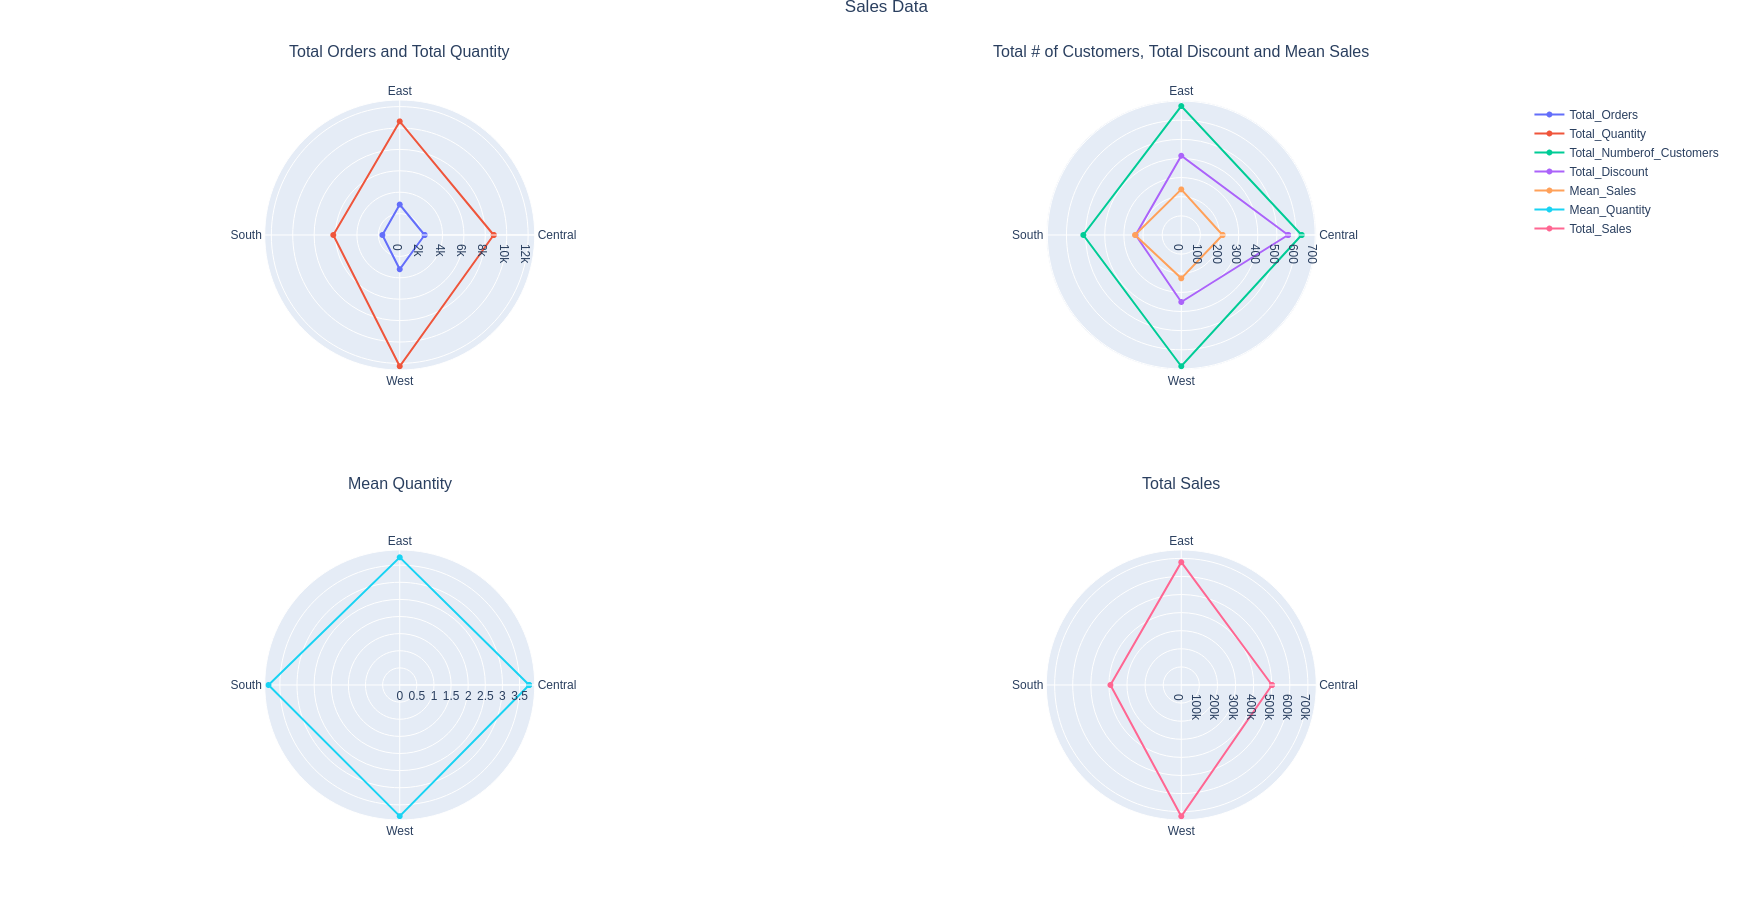

In [159]:
fig.add_trace(go.Scatterpolar(theta=list(grouped_data.index) + [grouped_data.index[0]],r=list(grouped_data['Total_Orders']) + [grouped_data['Total_Orders'].iloc[0]],name='Total_Orders'
                             ),row=1,col=1)
fig.add_trace(go.Scatterpolar(theta=list(grouped_data.index) + [grouped_data.index[0]],r=list(grouped_data['Total_Quantity']) + [grouped_data['Total_Quantity'].iloc[0]],name='Total_Quantity'
                              ),row=1,col=1)
fig.add_trace(go.Scatterpolar(theta=list(grouped_data.index) + [grouped_data.index[0]],r=list(grouped_data['Total_No_Customers']) + [grouped_data['Total_No_Customers'].iloc[0]],name='Total_Numberof_Customers'
                              ),row=1,col=2)
fig.add_trace(go.Scatterpolar(theta=list(grouped_data.index) + [grouped_data.index[0]],r=list(grouped_data['Total_Discount']) + [grouped_data['Total_Discount'].iloc[0]],name='Total_Discount'
                              ),row=1,col=2)
fig.add_trace(go.Scatterpolar(theta=list(grouped_data.index) + [grouped_data.index[0]],r=list(grouped_data['Mean_Sales']) + [grouped_data['Mean_Sales'].iloc[0]],name='Mean_Sales'
                              ),row=1,col=2)
fig.add_trace(go.Scatterpolar(theta=list(grouped_data.index) + [grouped_data.index[0]],r=list(grouped_data['Mean_Quantity']) + [grouped_data['Mean_Quantity'].iloc[0]],name='Mean_Quantity'
                              ),row=2,col=1)
fig.add_trace(go.Scatterpolar(theta=list(grouped_data.index) + [grouped_data.index[0]],r=list(grouped_data['Total_Sales']) + [grouped_data['Total_Sales'].iloc[0]],name='Total_Sales'
                              ),row=2,col=2)
fig.update_traces(mode="lines+markers")
# fig.update_traces(name=['Total_Orders','Total_Quantity'])
# fig.update_traces(marker=['Total_Orders','Total_Quantity'])
fig.update_layout(height=900,width=1700,title_text='Sales Data',title_x=0.51,title_y=1)
fig.layout.annotations[0].update(y=1.05)
fig.layout.annotations[1].update(y=1.05)
fig.layout.annotations[2].update(y=0.45)
fig.layout.annotations[3].update(y=0.45)
# fig.layout.annotations[4].update(y=0.5)
# fig.layout.annotations[5].update(y=0.5)
# for ann in fig['layout']['annotations']:
#     ann['yanchor']='bottom'
#     ann['y']=0.2
#     ann['yref']='paper'
fig.show()
# fig.update_layout(polar=dict(radialaxis=dict(type='log',tickangle=45),
#                             angularaxis=dict(
#                                 thetaunit='degrees',
#                                 dtick=45,
#                                 rotation=90,
#                                 direction='clockwise',
#                                 tickmode='array',
#                                 tickvals=[0,90,180,270],
#                                 ticktext=['East','Central','West','South']
#                             )))